# Credit_Card_Transaction

##### last modified: 12/05 4pm

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, KFold, cross_validate
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, average_precision_score, confusion_matrix, roc_curve,classification_report,ConfusionMatrixDisplay
import imblearn
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

### Data Preprocessing

In [7]:
df = pd.read_csv('credit_card_transactions.csv')

In [8]:
df.head(10)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,merch_zipcode
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,28705.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,NaN
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,83236.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,NaN
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,22844.0
5,5,2019-01-01 00:04:08,4767265376804500,"fraud_Stroman, Hudson and Erdman",gas_transport,94.63,Jennifer,Conner,F,4655 David Island,...,-75.2045,2158,Transport planner,1961-06-19,189a841a0a8ba03058526bcfe566aab5,1325376248,40.653382,-76.152667,0,17972.0
6,6,2019-01-01 00:04:42,30074693890476,fraud_Rowe-Vandervort,grocery_net,44.54,Kelsey,Richards,F,889 Sarah Station Suite 624,...,-100.9893,2691,Arboriculturist,1993-08-16,83ec1cc84142af6e2acf10c44949e720,1325376282,37.162705,-100.153370,0,NaN
7,7,2019-01-01 00:05:08,6011360759745864,fraud_Corwin-Collins,gas_transport,71.65,Steven,Williams,M,231 Flores Pass Suite 720,...,-78.6003,6018,"Designer, multimedia",1947-08-21,6d294ed2cc447d2c71c7171a3d54967c,1325376308,38.948089,-78.540296,0,22644.0
8,8,2019-01-01 00:05:18,4922710831011201,fraud_Herzog Ltd,misc_pos,4.27,Heather,Chase,F,6888 Hicks Stream Suite 954,...,-79.6607,1472,Public affairs consultant,1941-03-07,fc28024ce480f8ef21a32d64c93a29f5,1325376318,40.351813,-79.958146,0,15236.0
9,9,2019-01-01 00:06:01,2720830304681674,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,198.39,Melissa,Aguilar,F,21326 Taylor Squares Suite 708,...,-87.3490,151785,Pathologist,1974-03-28,3b9014ea8fb80bd65de0b1463b00b00e,1325376361,37.179198,-87.485381,0,42442.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 24 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

## Feature Engineeringnt.


In [11]:
ndf = df.drop(df.columns[0], axis=1)
ndf=ndf.drop(['trans_num', 'unix_time', 'first', 'last', 'street', 'city', 'state', 'merch_zipcode'], axis=1)
ndf['trans_date_trans_time'] = pd.to_datetime(ndf['trans_date_trans_time'])

# Extract components
ndf['year'] = ndf['trans_date_trans_time'].dt.year
ndf['month'] = ndf['trans_date_trans_time'].dt.month
ndf['day'] = ndf['trans_date_trans_time'].dt.day
ndf['hour'] = ndf['trans_date_trans_time'].dt.hour
ndf['minute'] = ndf['trans_date_trans_time'].dt.minute
ndf['second'] = ndf['trans_date_trans_time'].dt.second
ndf = ndf.drop(['trans_date_trans_time'],axis=1)

In [12]:
ndf['dob'] = pd.to_datetime(ndf['dob'])
ndf['year_born'] = ndf['dob'].dt.year
ndf['month_born'] = ndf['dob'].dt.month
ndf['day_born'] = ndf['dob'].dt.day
ndf = ndf.drop(['dob'],axis=1)

In [13]:
print("Missing values per column:")
print(ndf.isna().sum())
ndf = ndf.dropna()

Missing values per column:
cc_num        0
merchant      0
category      0
amt           0
gender        0
zip           0
lat           0
long          0
city_pop      0
job           0
merch_lat     0
merch_long    0
is_fraud      0
year          0
month         0
day           0
hour          0
minute        0
second        0
year_born     0
month_born    0
day_born      0
dtype: int64


## Data Splitting

In [15]:
X = ndf.drop(columns=['is_fraud'])
y = ndf['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

### Visualization: Highly Imbalanced Dataset

is_fraud Distribution:
 is_fraud
0    1289169
1       7506
Name: count, dtype: int64


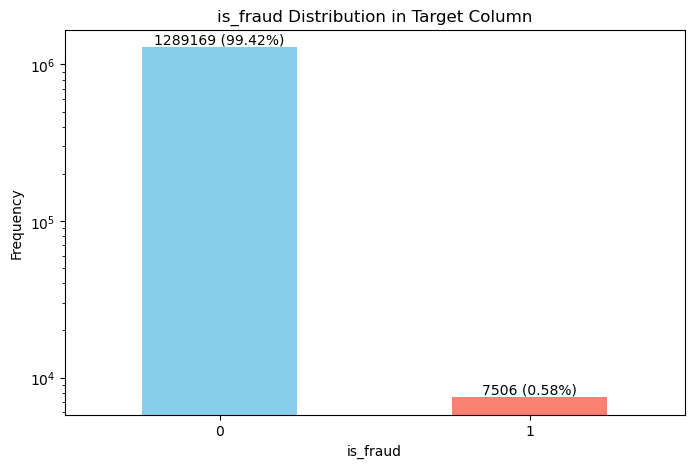

In [17]:
is_fraud_counts = ndf['is_fraud'].value_counts()
is_fraud_percentages = (is_fraud_counts / is_fraud_counts.sum()) * 100
print("is_fraud Distribution:\n", is_fraud_counts)

plt.figure(figsize=(8, 5))
ax = is_fraud_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('is_fraud Distribution in Target Column')
plt.xlabel('is_fraud')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xticks(rotation=0)
for i, count in enumerate(is_fraud_counts):
    percentage = f"{is_fraud_percentages[i]:.2f}%"
    ax.text(i, count, f"{count} ({percentage})", ha='center', va='bottom')

In [18]:
X_train

,cc_num,merchant,category,amt,gender,zip,lat,long,city_pop,job,...,merch_long,year,month,day,hour,minute,second,year_born,month_born,day_born
1027683,3558652751678952,fraud_Zboncak Ltd,food_dining,53.73,F,75661,32.6205,-94.2000,2807,Chiropodist,...,-94.234403,2020,3,2,1,31,33,1931,1,26
16183,3541160328600277,"fraud_Graham, Hegmann and Hammes",food_dining,2.91,M,62668,39.5723,-90.2379,1512,Commercial/residential surveyor,...,-89.515312,2019,1,10,14,17,34,2003,5,7
757710,4979422371139333,fraud_Kunze Inc,grocery_pos,143.94,F,68881,41.4193,-99.3844,73,Product designer,...,-98.774974,2019,11,20,7,35,23,1935,2,10
749924,4683638447911,fraud_Donnelly PLC,misc_net,108.76,M,70531,30.2510,-92.5002,1261,Broadcast presenter,...,-92.944039,2019,11,17,4,48,50,1972,7,1
1102852,3598215285024754,"fraud_Reilly, Heaney and Cole",gas_transport,88.37,F,11710,40.6729,-73.5365,34496,"Librarian, public",...,-73.430208,2020,4,4,1,36,48,1970,10,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
760825,3559723917628303,"fraud_Heller, Gutmann and Zieme",grocery_pos,94.37,M,60072,42.4048,-88.3054,928,Outdoor activities/education manager,...,-88.539712,2019,11,22,0,58,21,1985,5,13
424356,374656033243756,fraud_Langworth LLC,personal_care,5.88,M,22213,38.8954,-77.1633,207410,Mudlogger,...,-76.467579,2019,7,9,12,23,12,1984,7,3
1055250,4509142395811241,"fraud_Jenkins, Hauck and Friesen",gas_transport,60.59,F,31563,31.6489,-82.1982,1324,"Engineer, technical sales",...,-82.181731,2020,3,14,5,54,37,1926,7,12
269407,501831082224,fraud_Kerluke Inc,misc_net,7.28,M,16878,40.9493,-78.3129,1762,Armed forces logistics/support/administrative ...,...,-77.768315,2019,5,13,9,51,17,1962,5,4


In [19]:
# !pip install category_encoders
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

X_train=pd.get_dummies(X_train, columns=['gender'])
X_train=X_train.drop(columns=['gender_F'])

target_features = ['merchant', 'category', 'job']
te=TargetEncoder(cols=target_features).fit(X_train, y_train)
X_train=te.transform(X_train)

X_train = X_train.drop(['zip', 'merch_lat', 'merch_long'],axis=1)
X_test=pd.get_dummies(X_test, columns=['gender'])
X_test=X_test.drop(columns=['gender_F'])

X_test=te.transform(X_test)
X_test = X_test.drop(['zip', 'merch_lat', 'merch_long'],axis=1)

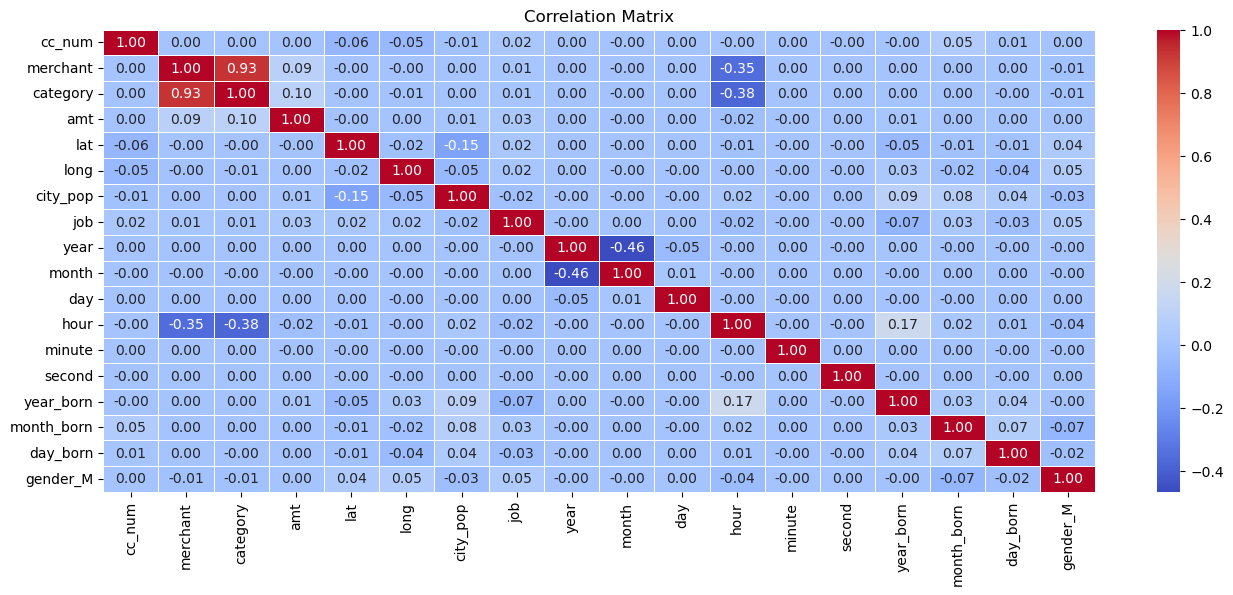

In [20]:
corr_matrix=X_train.corr()

plt.figure(figsize=(16,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

## Scaling Numerical Features

In [22]:
scaler = StandardScaler()
X_train[['amt','lat', 'long']]=scaler.fit_transform(X_train[['amt','lat', 'long']])
X_test[['amt','lat', 'long']]=scaler.transform(X_test[['amt','lat', 'long']])

AUC score:  0.890952385856908
Average Precision:  0.7441723313119522
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    257834
     Class 1       0.95      0.78      0.86      1501

    accuracy                           1.00    259335
   macro avg       0.97      0.89      0.93    259335
weighted avg       1.00      1.00      1.00    259335



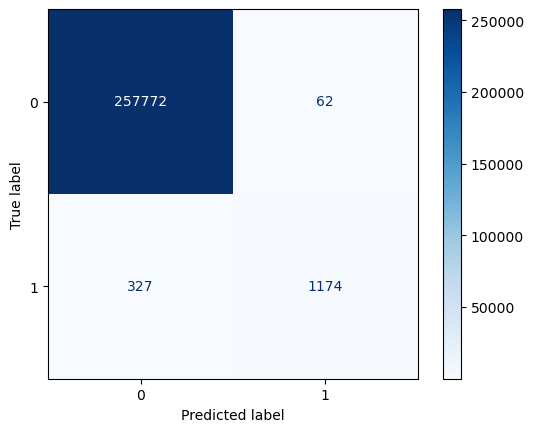

In [85]:
from sklearn.metrics import classification_report
model = DecisionTreeClassifier(max_depth=10, random_state=1)
model.fit(X_train, y_train)

y_pred_train = cross_val_predict(model, X_train, y_train, cv=5, method="predict_proba")[:, 1]
y_pred_test = model.predict(X_test)

default_auc_score=roc_auc_score(y_test, y_pred_test)
default_precision=average_precision_score(y_test, y_pred_test)

print('AUC score: ', default_auc_score)
print('Average Precision: ', default_precision)

conf_matrix = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=model.classes_)
disp.plot(cmap="Blues", colorbar=True)

report = classification_report(y_test, y_pred_test, target_names=["Class 0", "Class 1"])
print(report)

## Data Resampling

AUC score:  0.9682799553355933
Average Precision:  0.24394368016830162
              precision    recall  f1-score   support

     Class 0       1.00      0.98      0.99    257834
     Class 1       0.26      0.95      0.40      1501

    accuracy                           0.98    259335
   macro avg       0.63      0.97      0.70    259335
weighted avg       1.00      0.98      0.99    259335



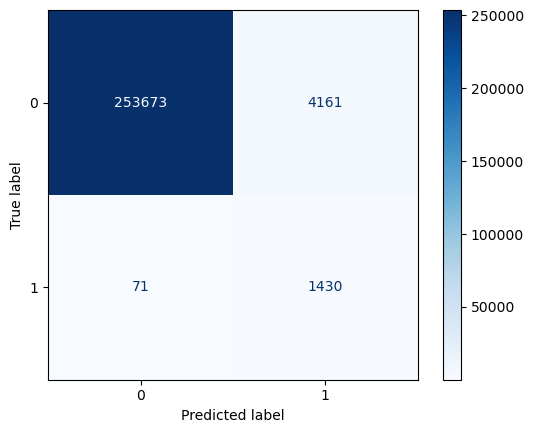

In [86]:
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
ros=RandomOverSampler(random_state=1)
X_train_oversample, y_train_oversample=ros.fit_resample(X_train, y_train)

oversample_model = DecisionTreeClassifier(
    max_depth=10,
    random_state=1
)
# Perform cross-validation with scoring for AUC, Average Precision, and F1 score
oversample_model.fit(X_train_oversample, y_train_oversample)
y_pred_oversample = oversample_model.predict(X_test)

oversample_auc_score=roc_auc_score(y_test, y_pred_oversample)
oversample_precision_score=average_precision_score(y_test, y_pred_oversample)
print('AUC score: ', oversample_auc_score)
print('Average Precision: ', oversample_precision_score)

conf_matrix = confusion_matrix(y_test, y_pred_oversample)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=oversample_model.classes_)
disp.plot(cmap="Blues", colorbar=True)

report = classification_report(y_test, y_pred_oversample, target_names=["Class 0", "Class 1"])
print(report)

AUC score:  0.9655026789388482
Average Precision:  0.14734588453984676
              precision    recall  f1-score   support

     Class 0       1.00      0.97      0.98    257834
     Class 1       0.15      0.96      0.26      1501

    accuracy                           0.97    259335
   macro avg       0.58      0.97      0.62    259335
weighted avg       0.99      0.97      0.98    259335



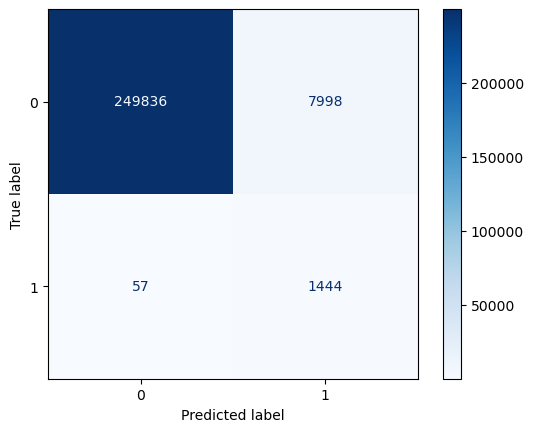

In [87]:
rus=RandomUnderSampler(random_state=1)
X_train_subsample, y_train_subsample=rus.fit_resample(X_train, y_train)

undersampling_model = DecisionTreeClassifier(
    max_depth=10,
    random_state=1
)

undersampling_model.fit(X_train_subsample, y_train_subsample)
y_pred_undersample = undersampling_model.predict(X_test)

subsample_auc_score=roc_auc_score(y_test, y_pred_undersample)
subsample_precision_score=average_precision_score(y_test, y_pred_undersample)
print('AUC score: ', subsample_auc_score)
print('Average Precision: ', subsample_precision_score)

conf_matrix = confusion_matrix(y_test, y_pred_undersample)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=undersampling_model.classes_)
disp.plot(cmap="Blues", colorbar=True)

report = classification_report(y_test, y_pred_undersample, target_names=["Class 0", "Class 1"])
print(report)

AUC score:  0.9303789626156183
Average Precision:  0.21284821606557489
              precision    recall  f1-score   support

     Class 0       1.00      0.97      0.98    257834
     Class 1       0.15      0.96      0.26      1501

    accuracy                           0.97    259335
   macro avg       0.58      0.97      0.62    259335
weighted avg       0.99      0.97      0.98    259335



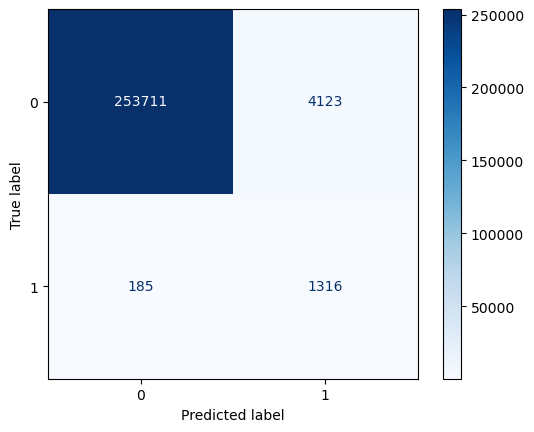

In [88]:
smote=SMOTE(random_state=1)
X_train_smote, y_train_smote=smote.fit_resample(X_train, y_train)

smote_model = DecisionTreeClassifier(
    max_depth=10,
    random_state=1
)

smote_model.fit(X_train_smote, y_train_smote)
y_pred_smote = smote_model.predict(X_test)

smote_auc_score=roc_auc_score(y_test, y_pred_smote)
smote_precision_score=average_precision_score(y_test, y_pred_smote)
print('AUC score: ', smote_auc_score)
print('Average Precision: ', smote_precision_score)

conf_matrix = confusion_matrix(y_test, y_pred_smote)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=smote_model.classes_)
disp.plot(cmap="Blues", colorbar=True)

report = classification_report(y_test, y_pred_smote, target_names=["Class 0", "Class 1"])
print(report)

### Model Selection

D:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:32:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:32:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:33:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
D:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:33:20] WAR


Tuned XGBoost Performance Metrics:
Mean AUC: 0.9988937036802744
Mean Average Precision: 0.9529998475946639
Mean F1 Score: 0.8923852602745038


D:\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [00:33:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    257834
     Class 1       0.98      0.84      0.90      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.92      0.95    259335
weighted avg       1.00      1.00      1.00    259335



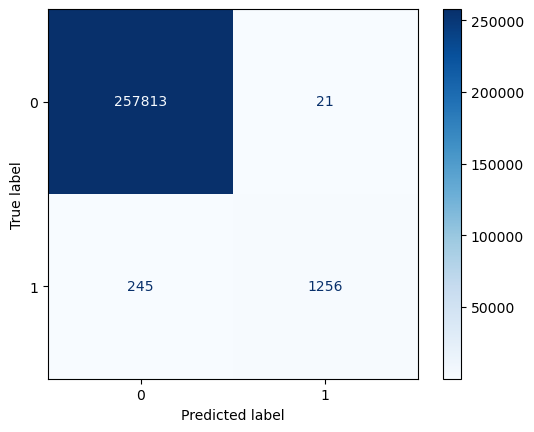

In [93]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

xgb_model = XGBClassifier(subsample = 0.7, n_estimators = 300, max_depth = 10, learning_rate = 0.1, colsample_bytree = 0.5, random_state=1, use_label_encoder=False, eval_metric='auc')
xgb_model.fit(X_train, y_train)
best_xgb_model = xgb_model
xgb_scores = cross_validate(best_xgb_model, X_train, y_train, cv=5,
                             scoring=['roc_auc', 'average_precision', 'f1'])

print("\nTuned XGBoost Performance Metrics:")
print("Mean AUC:", xgb_scores['test_roc_auc'].mean())
print("Mean Average Precision:", xgb_scores['test_average_precision'].mean())
print("Mean F1 Score:", xgb_scores['test_f1'].mean())

best_xgb_model.fit(X_train, y_train)
y_pred_xgb = best_xgb_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=best_xgb_model.classes_)
disp.plot(cmap="Blues", colorbar=True)

report = classification_report(y_test, y_pred_xgb, target_names=["Class 0", "Class 1"])
print(report)

AUC score:  0.5
Average Precision:  0.005787880540613492


D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
D:\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

     Class 0       0.99      1.00      1.00    257834
     Class 1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335



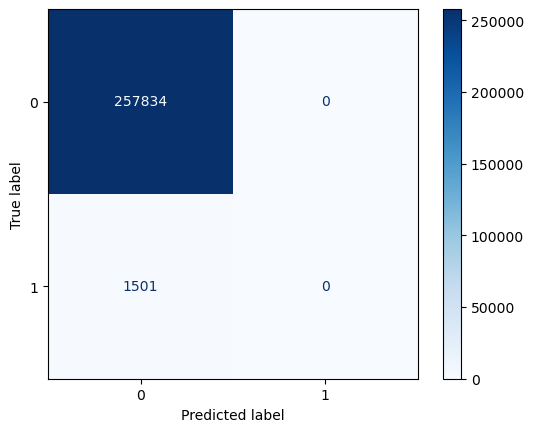

In [94]:
from sklearn.linear_model import LogisticRegression
# Logistic Regression Analysis
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Make predictions
y_pred_log = log_model.predict(X_test)

# Evaluate the model
LogisticRegression_auc_score = roc_auc_score(y_test, y_pred_log)
LogisticRegression_precision = average_precision_score(y_test, y_pred_log)

print('AUC score: ', LogisticRegression_auc_score)
print('Average Precision: ', LogisticRegression_precision)

conf_matrix = confusion_matrix(y_test, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=log_model.classes_)
disp.plot(cmap="Blues", colorbar=True)

report = classification_report(y_test, y_pred_log, target_names=["Class 0", "Class 1"])
print(report)

AUC score:  0.8697147130238376
Average Precision:  0.7279260783426148
              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00    257834
     Class 1       0.98      0.74      0.84      1501

    accuracy                           1.00    259335
   macro avg       0.99      0.87      0.92    259335
weighted avg       1.00      1.00      1.00    259335



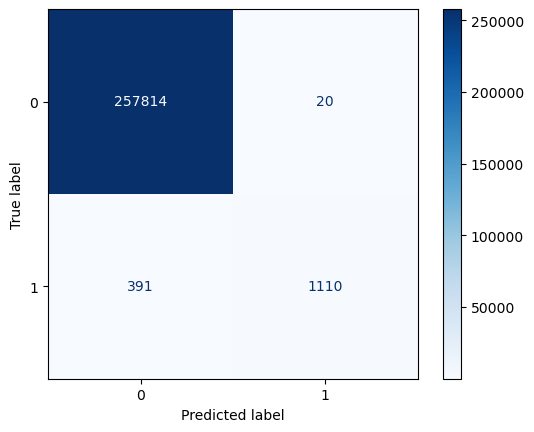

In [101]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
# Train a Random Forest classifier
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train, y_train)

# Make predictions
y_pred_ran = classifier.predict(X_test)

# Evaluate the model
RandomForest_auc_score = roc_auc_score(y_test, y_pred_ran)
RandomForest_precision = average_precision_score(y_test, y_pred_ran)

print('AUC score: ', RandomForest_auc_score)
print('Average Precision: ', RandomForest_precision)

conf_matrix = confusion_matrix(y_test, y_pred_ran)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=classifier.classes_)
disp.plot(cmap="Blues", colorbar=True)

report = classification_report(y_test, y_pred_ran, target_names=["Class 0", "Class 1"])
print(report)